In [ ]:
from wordcloud import WordCloud, STOPWORDS
import pandas as pd
import numpy as np
from sklearn import metrics
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix
import re
import string
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
import os
import nltk
from nltk.corpus import stopwords
from sklearn.linear_model import PassiveAggressiveClassifier
from sklearn.feature_extraction.text import CountVectorizer, TfidfTransformer, TfidfVectorizer
from sklearn.metrics import plot_confusion_matrix
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report, accuracy_score
from sklearn.metrics import accuracy_score, f1_score, precision_score, recall_score
from sklearn.model_selection import cross_val_score
import itertools

In [ ]:
df = pd.read_csv("/content/drive/MyDrive/research/data.csv")
df.head()

,headlines,outcome
0,A post claims compulsory vacination violates t...,0
1,A photo claims that this person is a doctor wh...,0
2,Post about a video claims that it is a protest...,0
3,All deaths by respiratory failure and pneumoni...,0
4,The dean of the College of Biologists of Euska...,0


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10201 entries, 0 to 10200
Data columns (total 2 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   headlines  10201 non-null  object
 1   outcome    10201 non-null  int64 
dtypes: int64(1), object(1)
memory usage: 159.5+ KB


In [ ]:
df1 = df[df['outcome'] == 1]
df1.to_csv(f'true.csv', index=False)
true = pd.read_csv("true.csv")

df1 = df[df['outcome'] == 0]
df1.to_csv(f'fake.csv', index=False)
fake = pd.read_csv("fake.csv")

In [ ]:
true.head()

,headlines,outcome
0,“3.8% of Wisconsin’s coronavirus funding has b...,1
1,There’s a “direct correlation” between North C...,1
2,"“There have been five randomized controlled, p...",1
3,“Five veterinary labs have their CLIA certific...,1
4,Say Wisconsin Republican lawmakers have done n...,1


In [ ]:
fake.head()

,headlines,outcome
0,A post claims compulsory vacination violates t...,0
1,A photo claims that this person is a doctor wh...,0
2,Post about a video claims that it is a protest...,0
3,All deaths by respiratory failure and pneumoni...,0
4,The dean of the College of Biologists of Euska...,0


In [ ]:
fake['target'] = 'fake'
true['target'] = 'true'

In [ ]:
data = pd.concat([fake, true]).reset_index(drop = True)

In [ ]:
from sklearn.utils import shuffle
data = shuffle(data)
data = data.reset_index(drop=True)

In [ ]:
data['headlines'] = data['headlines'].apply(lambda x: x.lower())

In [ ]:
import string
def punctuation_removal(text):
    all_list = [char for char in text if char not in string.punctuation]
    clean_str = ''.join(all_list)
    return clean_str
data['headlines'] = data['headlines'].apply(punctuation_removal)

In [ ]:
import nltk
nltk.download('stopwords')
from nltk.corpus import stopwords
stop = stopwords.words('english')
data['headlines'] = data['headlines'].apply(lambda x: ' '.join([word for word in x.split() if word not in (stop)]))

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


target
fake    9727
true     474
Name: headlines, dtype: int64


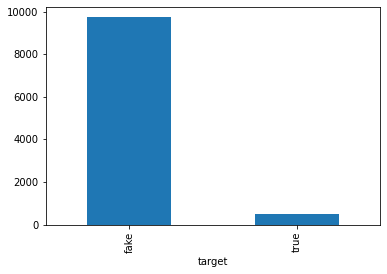

In [ ]:
print(data.groupby(['target'])['headlines'].count())
data.groupby(['target'])['headlines'].count().plot(kind="bar")
plt.savefig("total fake and real news1.jpg")
plt.show()

In [ ]:
from nltk import tokenize
token_space = tokenize.WhitespaceTokenizer()
def counter(text, column_text, quantity):
    all_words = ' '.join([text for text in text[column_text]])
    token_phrase = token_space.tokenize(all_words)
    frequency = nltk.FreqDist(token_phrase)
    df_frequency = pd.DataFrame({"Word": list(frequency.keys()),
    "Frequency": list(frequency.values())})
    df_frequency = df_frequency.nlargest(columns = "Frequency", n = quantity)
    plt.figure(figsize=(12,8))
    ax = sns.barplot(data = df_frequency, x = "Word", y = "Frequency", color = 'blue')
    ax.set(ylabel = "Count")
    plt.xticks(rotation='vertical')
    plt.savefig("counter.jpg")
    plt.show()

In [ ]:
X_train,X_test,y_train,y_test = train_test_split(data['headlines'], data.target, test_size=0.2, random_state=42)

In [ ]:
def print_metrices(pred,true):
    print(confusion_matrix(true,pred))
    print(classification_report(true,pred,))
    print("Accuracy : ",accuracy_score(pred,true))
    print("Precison : ",precision_score(pred,true, average = 'weighted'))
    print("Recall : ",recall_score(pred,true, average = 'weighted'))
    print("F1 : ",f1_score(pred,true, average = 'weighted'))

In [ ]:
from sklearn.metrics import accuracy_score
# Vectorizing and applying TF-IDF
from sklearn.pipeline import Pipeline
from sklearn import linear_model
from sklearn.feature_extraction.text import TfidfTransformer
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.linear_model import SGDClassifier
pipe = Pipeline([('vect', CountVectorizer()),
('tfidf', TfidfTransformer()),
('model', SGDClassifier())])

# Fitting the model
model = pipe.fit(X_train, y_train)
# Accuracy
pred = model.predict(X_test)
print_metrices(pred,y_test)
#print("accuracy: {}%".format(round(accuracy_score(y_test, prediction)*100,2)))

[[1937    1]
 [  58   45]]
              precision    recall  f1-score   support

        fake       0.97      1.00      0.98      1938
        true       0.98      0.44      0.60       103

    accuracy                           0.97      2041
   macro avg       0.97      0.72      0.79      2041
weighted avg       0.97      0.97      0.97      2041

Accuracy :  0.9710926016658501
Precison :  0.9868043486594488
Recall :  0.9710926016658501
F1 :  0.976412395231477
